In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

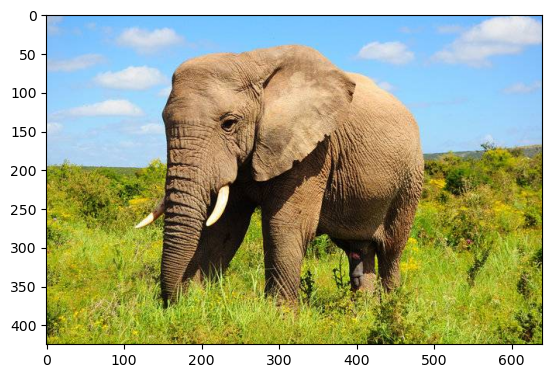

In [2]:
img=cv2.imread(r"C:\Users\intel\Desktop\elephant.jpg")
plt.imshow(img[...,::-1]);

In [3]:
rows=open(r"C:\Users\intel\Desktop\synset_words.txt").read().strip().split("\n")
classes=[r[r.find(" ")+1:].split(",")[0] for r in rows]
classes

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [4]:
blob=cv2.dnn.blobFromImage(img,1,(224,224),(104,117,123))
blob.shape

(1, 3, 224, 224)

In [5]:
net=cv2.dnn.readNetFromCaffe("bvlc_googlenet.prototxt","bvlc_googlenet.caffemodel")


In [6]:
?cv2.dnn.readNetFromCaffe

In [7]:
net.setInput(blob)

In [8]:
preds=net.forward()
preds.shape

(1, 1000)

In [22]:
?net.forward

In [9]:
np.argmax(preds)

386

In [28]:
print(np.argmax(preds))

386


In [10]:
idx=np.argmax(preds)
classes[idx]

'African elephant'

In [11]:
idxx=np.argsort(preds[0])[::-1][:3]
for idx in idxx:
    print(classes[idx])

African elephant
tusker
Indian elephant


In [12]:
idxx=np.argsort(preds[0])[::-1][:3]
for idx in idxx:
    print("{}:{:.2f}%".format(classes[idx],preds[0][idx]*100))

African elephant:82.85%
tusker:13.52%
Indian elephant:3.63%


In [33]:
img=cv2.imread(r"C:\Users\intel\Desktop\elephant.jpg")
label,condidence =(img)
plt.imshow(img[...,::-1])
plt.title("{} {}%".format(label,condidence))

TypeError: 'cv2.dnn.Net' object is not callable